In [1]:
import tensorflow as tf
import numpy
import pandas
import os


2023-08-11 14:10:26.624570: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
print(tf.constant([[1,2],[3,4]]))

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)


2023-08-11 14:10:37.556416: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-08-11 14:10:37.557556: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-08-11 14:10:37.557591: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2023-08-11 14:10:37.557631: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (VMDebianVIVO): /proc/driver/nvidia/version does not exist
2023-08-11 14:10:37.604801: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild Tens

In [3]:
os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
print(tf.__version__)
a = tf.constant(1.)
b = tf.constant(2.)
print(a+b)
# print('GPU:', tf.test.is_gpu_available())

2.4.1
tf.Tensor(3.0, shape=(), dtype=float32)


In [4]:
c = tf.constant(1)
v = tf.Variable(1)

print("c= ", c)
print("v= ", v)

c=  tf.Tensor(1, shape=(), dtype=int32)
v=  <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=1>


In [5]:
x = tf.constant(4)
print(x)
print("{}維Tensor".format(x.ndim))  

tf.Tensor(4, shape=(), dtype=int32)
0維Tensor


In [6]:
# 一維張量稱「向量」
x = tf.constant([1, 2, 3, 4, 5, 6])
print("{}維Tensor".format(x.ndim)) 

1維Tensor


In [7]:
# 二維張量稱「矩陣」
x = tf.constant([[1, 2, 3], [4, 5, 6]])
print("{}維Tensor".format(x.ndim)) 

2維Tensor


In [8]:
# 檢查Eager Execution模式是否啟動
print("Eager Execution模式是否啟動：{}".format(tf.executing_eagerly()))

Eager Execution模式是否啟動：True


In [9]:
a = 3
b = 4
c = a + b
print("a + b = {}".format(c))

a + b = 7


In [10]:
import numpy as np
# Eager Execution模式下，可以混合Tensor and Numpy做運算
a = tf.constant([[1.,2.], [3.,4.]], dtype = tf.float32)
b = np.array([[1.,0.],[2.,3.]], dtype = np.float32)
print("a constant: {}D Tensor".format(a.ndim))

c = a + b
print("a + b = \n{}".format(c))

d = tf.matmul(a, b)
print("a * b = \n{}".format(d))


a constant: 2D Tensor
a + b = 
[[2. 2.]
 [5. 7.]]
a * b = 
[[ 5.  6.]
 [11. 12.]]


In [11]:
print("NumpyArray:\n {}".format(c.numpy()))

NumpyArray:
 [[2. 2.]
 [5. 7.]]


In [12]:
# 計算梯度(Gradient)
w = tf.Variable([[1.0]])

with tf.GradientTape() as tape :
    loss = w * w

grad = tape.gradient(loss, w)
print(grad)

tf.Tensor([[2.]], shape=(1, 1), dtype=float32)


In [13]:
# Seqential Model (pdf.43)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from IPython.display import Image



In [14]:
# Method one
model = keras.Sequential(name = 'Sequential')
model.add(layers.Dense(64, activation = 'relu', input_shape = (784,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [15]:
# Method two
model = tf.keras.Sequential([
    layers.Dense(64, activation = 'relu', input_shape = (784,)),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

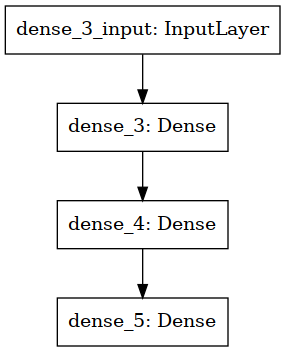

In [16]:
plot_model(model, to_file='Functional_API_Sequential_Model.png')
#Image('Functional_API_Sequential_Model')

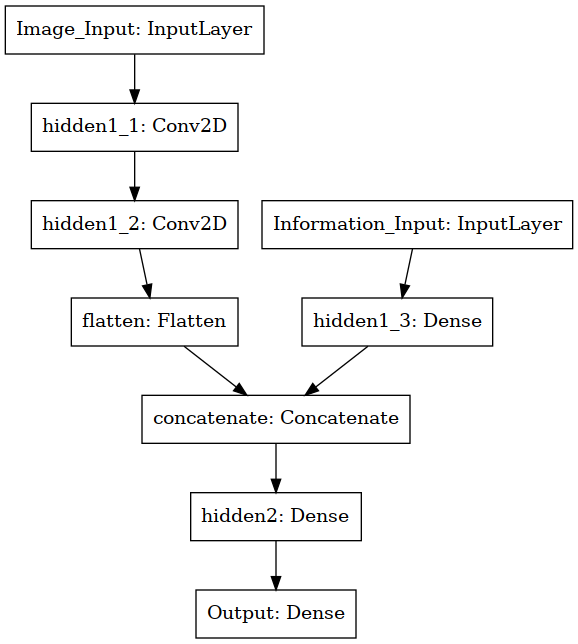

In [17]:
# Book pdf.47
# Multi Input Model
img_input = keras.Input(shape = (128, 128, 3), name = 'Image_Input')
info_input = keras.Input(shape = (1, ), name = 'Information_Input')

h1_1 = layers.Conv2D(64, 5, strides = 2, activation = 'relu', name = 'hidden1_1')(img_input)
h1_2 = layers.Conv2D(32, 5, strides = 2, activation = 'relu', name = 'hidden1_2')(h1_1)
h1_2_ft = layers.Flatten()(h1_2)
h1_3 = layers.Dense(64, activation = 'relu', name = 'hidden1_3')(info_input)
concat = layers.Concatenate()([h1_2_ft, h1_3])
h2 = layers.Dense(64, activation = 'relu', name = 'hidden2')(concat)

outputs = layers.Dense(1, name = 'Output')(h2)

model = keras.Model(inputs = [img_input, info_input], outputs = outputs)

plot_model(model, to_file = 'Functional_API_Multi_Input_Model.png')
#Image('Functional_API_Multi_Input_Model.png')


In [19]:
#pdf.52, §1.7.2
dataset = tf.data.Dataset.from_tensors(tf.constant([1,2,3,4,5,6,7,8,9,0], shape=(10,)))
print(dataset)

<TensorDataset shapes: (10,), types: tf.int32>


In [21]:
x_data = tf.data.Dataset.from_tensor_slices(tf.constant([1,2,3,4,5,6,7,8,9,0]))
print(x_data)

<TensorSliceDataset shapes: (), types: tf.int32>


In [22]:
y_data = tf.data.Dataset.from_tensor_slices(tf.constant([0,2,4,6,8,10,12,14,16,18]))
print(y_data)

<TensorSliceDataset shapes: (), types: tf.int32>


In [24]:
for data in x_data :
    print(data)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)


In [30]:
# from_tensor_slices EXAMPLE : https://blog.csdn.net/Dr_jiabin/article/details/93366661
features, labels = (np.random.sample((6, 3)), np.random.sample((6, 1)))
print((features, labels))
data = tf.data.Dataset.from_tensor_slices((features, labels))
print(data)

(array([[0.2249631 , 0.93117086, 0.90192527],
       [0.39860075, 0.56494056, 0.23058764],
       [0.01535565, 0.92312895, 0.10891835],
       [0.31898865, 0.97444233, 0.46727801],
       [0.77424271, 0.27877305, 0.18922496],
       [0.46599859, 0.83716943, 0.84190895]]), array([[0.89710357],
       [0.44050556],
       [0.17125768],
       [0.26444387],
       [0.65594387],
       [0.01494594]]))
<TensorSliceDataset shapes: ((3,), (1,)), types: (tf.float64, tf.float64)>
